# 三角板关键点检测-可视化训练日志

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 进入mmdetection主目录

In [1]:
import os
os.chdir('mmpose')

## 导入工具包

In [2]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 载入训练日志

In [3]:
# 日志文件路径
log_path = 'work_dirs/rtmpose-s_triangle_8xb256-420e_coco-256x192/20230405_230350/vis_data/scalars.json'

In [4]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [5]:
len(json_list)

2130

In [6]:
eval(json_list[4])

{'lr': 0.0008421368421052633,
 'data_time': 8.446477031707763,
 'loss': 0.4118357300758362,
 'loss_kpt': 0.4118357300758362,
 'acc_pose': 0.020833333333333332,
 'time': 8.606922483444214,
 'epoch': 1,
 'memory': 3069,
 'step': 5}

In [7]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/AP' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

100%|██████████| 2130/2130 [00:02<00:00, 965.91it/s]


In [8]:
df_train

,lr,data_time,loss,loss_kpt,acc_pose,time,epoch,memory,step
0,4.000000e-08,9.268967,0.410665,0.410665,0.000000,9.524278,1.0,2907.0,1.0
1,2.105642e-04,8.653952,0.416243,0.416243,0.000000,8.852314,1.0,3069.0,2.0
2,4.210884e-04,8.522007,0.414136,0.414136,0.000000,8.699290,1.0,3069.0,3.0
3,6.316126e-04,8.508766,0.413406,0.413406,0.000000,8.675523,1.0,3069.0,4.0
4,8.421368e-04,8.446477,0.411836,0.411836,0.020833,8.606922,1.0,3069.0,5.0
...,...,...,...,...,...,...,...,...,...
2095,2.002126e-04,8.289655,0.022236,0.022236,0.989247,8.424167,300.0,3069.0,2096.0
2096,2.001361e-04,8.285214,0.022300,0.022300,1.000000,8.419918,300.0,3069.0,2097.0
2097,2.000765e-04,8.270541,0.022299,0.022299,0.989583,8.405259,300.0,3069.0,2098.0
2098,2.000340e-04,8.275322,0.022289,0.022289,1.000000,8.410211,300.0,3069.0,2099.0


In [9]:
df_test

,coco/AP,coco/AP .5,coco/AP .75,coco/AP (M),coco/AP (L),coco/AR,coco/AR .5,coco/AR .75,coco/AR (M),coco/AR (L),PCK,AUC,NME,data_time,time,step
0,0.000000,0.000000,0.000000,-1.0,0.000000,0.000,0.00,0.00,-1.0,0.000,0.020272,0.000000,1.164598,1.426880,1.469981,10.0
1,0.066539,0.247317,0.000874,-1.0,0.066539,0.106,0.34,0.02,-1.0,0.106,0.391293,0.029728,0.190894,1.417881,1.458537,20.0
2,0.348180,0.777606,0.294260,-1.0,0.348180,0.388,0.80,0.34,-1.0,0.388,0.790748,0.034075,0.103926,1.409061,1.449074,30.0
3,0.093968,0.348280,0.007838,-1.0,0.093968,0.164,0.46,0.06,-1.0,0.164,0.499728,0.005762,0.263507,1.406002,1.445559,40.0
4,0.528303,0.893092,0.458013,-1.0,0.528303,0.574,0.90,0.54,-1.0,0.574,0.865170,0.101721,0.084948,1.408485,1.447926,50.0
5,0.628415,0.979802,0.683079,-1.0,0.628415,0.676,0.98,0.72,-1.0,0.676,0.939320,0.071844,0.061230,1.407327,1.445948,60.0
6,0.730573,0.980198,0.768845,-1.0,0.730573,0.766,0.98,0.82,-1.0,0.766,0.959320,0.128361,0.053641,1.417349,1.455990,70.0
7,0.780064,0.980198,0.926037,-1.0,0.780064,0.814,0.98,0.94,-1.0,0.814,0.986531,0.169449,0.031814,1.393477,1.431594,80.0
8,0.689685,0.979802,0.724107,-1.0,0.689685,0.740,0.98,0.78,-1.0,0.740,0.959456,0.122374,0.056038,1.396362,1.434172,90.0
9,0.827124,0.980198,0.957971,-1.0,0.827124,0.860,0.98,0.96,-1.0,0.860,0.986531,0.187973,0.047042,1.400678,1.438443,100.0


## 导出训练日志表格

In [10]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

## 设置Matplotlib中文字体

In [11]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [12]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [13]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


--2023-04-06 08:43:13--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  21.7MB/s    用时 0.4s    

2023-04-06 08:43:14 (21.7 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



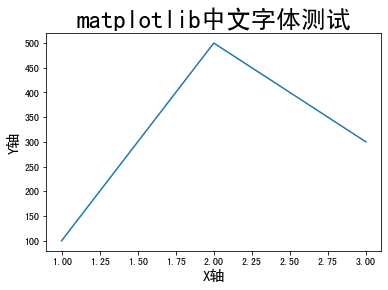

In [14]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 可视化辅助函数

In [15]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [16]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'loss_kpt', 'acc_pose', 'time', 'epoch',
       'memory', 'step'],
      dtype='object')

In [17]:
metrics = ['loss', 'loss_kpt']

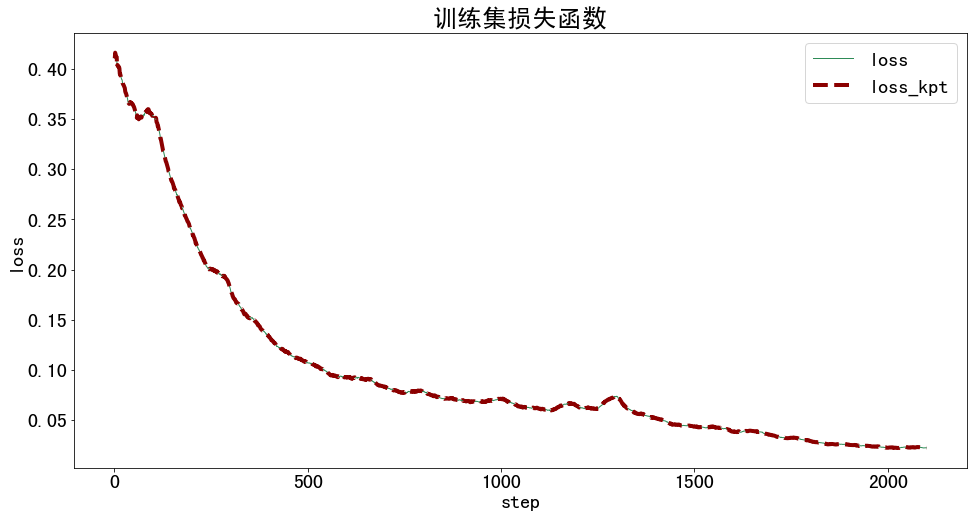

In [18]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 训练集准确率

In [19]:
metrics = ['acc_pose']

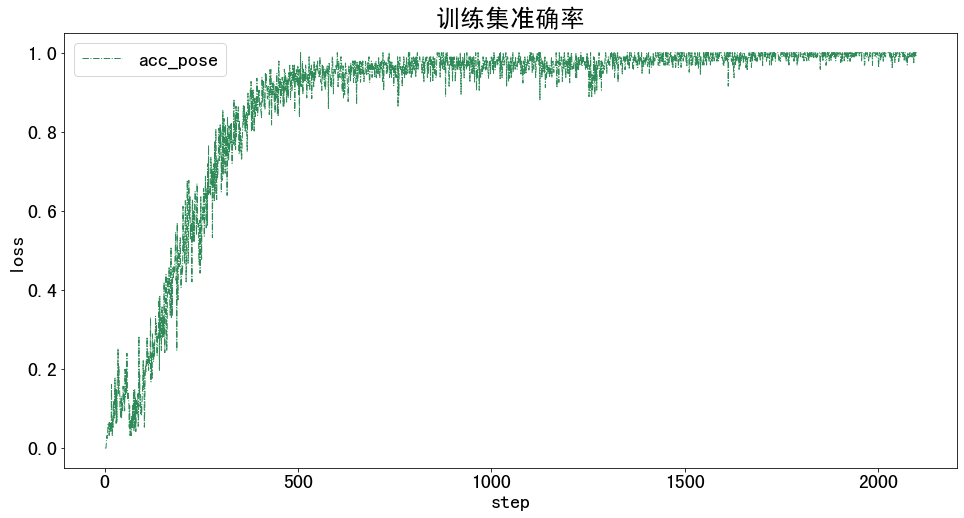

In [20]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-MS COCO Metric

In [21]:
df_test.columns

Index(['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)',
       'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)',
       'PCK', 'AUC', 'NME', 'data_time', 'time', 'step'],
      dtype='object')

In [25]:
metrics = ['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)', 'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)', 'PCK', 'AUC']


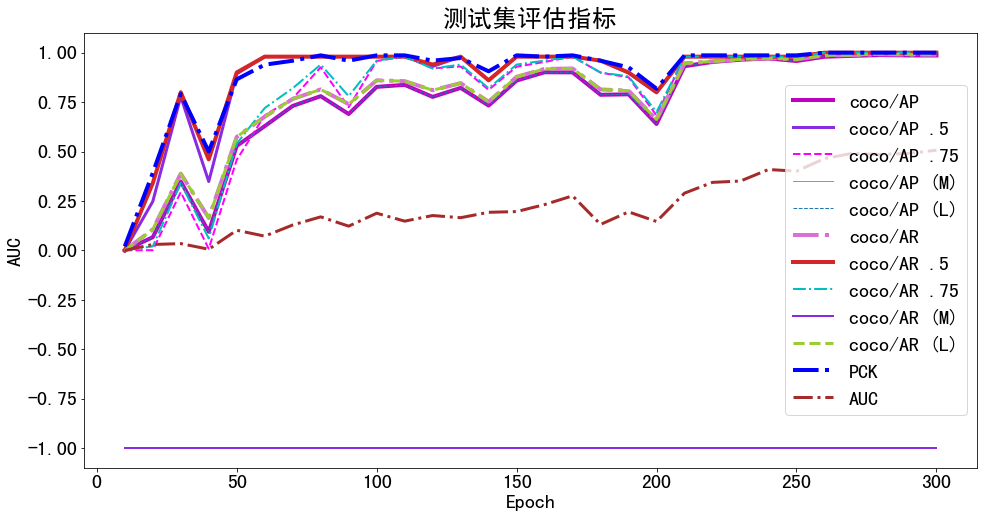

In [26]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-NME

In [28]:
metrics = ['NME']

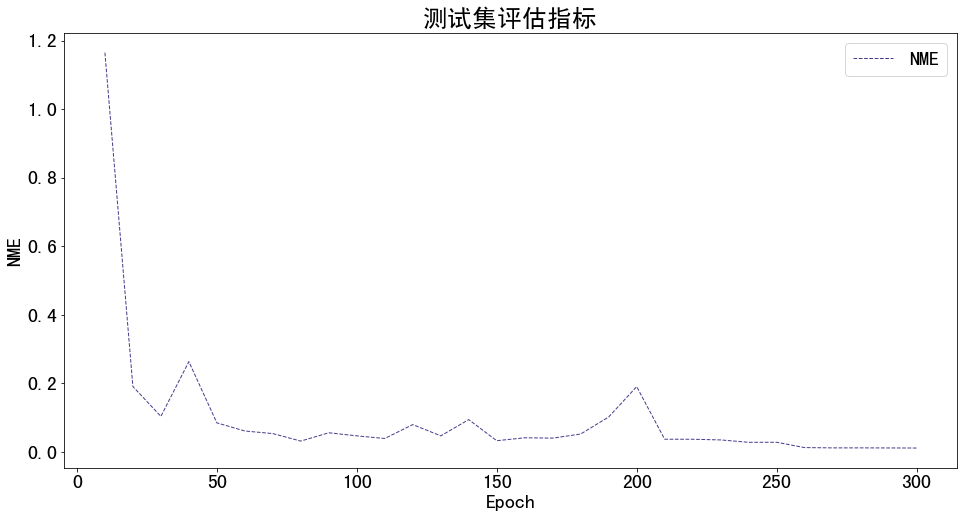

In [29]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()